In [1]:
import numpy as np
import pandas as pd
print(" imported sucessfully")

 imported sucessfully


In [2]:
# Open the file in binary mode
with open('E:\\6th semmmm\\spam\\spam.csv', 'rb') as f:
    # Read the bytes from the file
    byte_data = f.read()

# Try decoding the byte data with different encodings
encodings = ['utf-8', 'latin-1', 'utf-16']
for encoding in encodings:
    try:
        # Attempt to decode the byte data
        content = byte_data.decode(encoding)
        print("Decoding successful with encoding:", encoding)
        # Print or use the decoded content
        print(content)
        break
    except UnicodeDecodeError:
        print("Failed to decode with encoding:", encoding)


Failed to decode with encoding: utf-8
Decoding successful with encoding: latin-1
v1,v2,,,
ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",,,
ham,Ok lar... Joking wif u oni...,,,
spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,,,
ham,U dun say so early hor... U c already then say...,,,
ham,"Nah I don't think he goes to usf, he lives around here though",,,
spam,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv",,,
ham,Even my brother is not like to speak with me. They treat me like aids patent.,,,
ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune,,,
spam,WINNER!! As a valued network customer you h

In [3]:
import re
pattern=r'^\n(ham|spam),(?:.*),,,$'
matches=re.findall(pattern,content.strip())
matches

[]

In [4]:
content.replace("\r",'')

'v1,v2,,,\nham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",,,\nham,Ok lar... Joking wif u oni...,,,\nspam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C\'s apply 08452810075over18\'s,,,\nham,U dun say so early hor... U c already then say...,,,\nham,"Nah I don\'t think he goes to usf, he lives around here though",,,\nspam,"FreeMsg Hey there darling it\'s been 3 week\'s now and no word back! I\'d like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv",,,\nham,Even my brother is not like to speak with me. They treat me like aids patent.,,,\nham,As per your request \'Melle Melle (Oru Minnaminunginte Nurungu Vettam)\' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune,,,\nspam,WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call

In [5]:
texts='\r\nham,cud u tell ppl im gona b a bit l8 cos 2 buses hav gon past cos they were full & im still waitin 4 1. Pete x,,,\r\nham,'

In [6]:
texts.replace('\r','')

'\nham,cud u tell ppl im gona b a bit l8 cos 2 buses hav gon past cos they were full & im still waitin 4 1. Pete x,,,\nham,'

In [7]:
pattern=r'\n(ham|spam),(.*),,,'

In [8]:
matches=re.findall(pattern,content)
matches[100][1]

"I'm still looking for a car to buy. And have not gone 4the driving test yet."

In [9]:
det=[]
message=[]
for i in range(len(matches)):
    det.append(matches[i][0])
    message.append(matches[i][1])
print(" sucessfully")

 sucessfully


In [10]:
len(matches)

5522

In [11]:
# convert the lists into the dtafarames

In [12]:
df=pd.DataFrame({'target':det,'message':message})
print(" converted sucessfully")

 converted sucessfully


In [13]:
df.head()

,target,message
0,ham,"""Go until jurong point, crazy.. Available only..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"""Nah I don't think he goes to usf, he lives ar..."


In [14]:
# save the dtaaframers in case of emergencyys
df.to_csv("E:\\6th semmmm\\spam\\spams_det.csv")

In [15]:
# read from the files
df1=pd.read_csv("E:\\6th semmmm\\spam\\spams_det.csv")


In [16]:
df1.drop(columns='Unnamed: 0',inplace=True)

In [17]:
df1.head()

,target,message
0,ham,"""Go until jurong point, crazy.. Available only..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"""Nah I don't think he goes to usf, he lives ar..."


# text preprocessings

In [18]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
print(" imported")

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


 imported


In [19]:
encoder.fit_transform(df['target'])

array([0, 0, 1, ..., 0, 0, 0])

In [20]:
len(encoder.fit_transform(df['target']))

5522

In [21]:
df['target']=encoder.fit_transform(df['target'])

In [22]:
df.head()

,target,message
0,0,"""Go until jurong point, crazy.. Available only..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"""Nah I don't think he goes to usf, he lives ar..."


In [23]:
df['target'].value_counts()

target
0    4780
1     742
Name: count, dtype: int64

In [24]:
# check if the data contains the null values or not
df.isnull().sum()

target     0
message    0
dtype: int64

In [25]:
# check for the dupkuicates values
df.duplicated().sum()

396

In [26]:
# drop the duplicates values
df=df.drop_duplicates(keep='first')

In [27]:
df.duplicated().sum()

0

In [28]:
df['target'].value_counts()

target
0    4477
1     649
Name: count, dtype: int64

# perform the eda

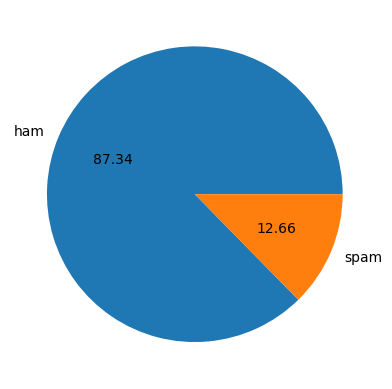

In [29]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()
# data is imbalanced

In [30]:
# make the heuristic features
df['num_characters']=df['message'].apply(len)

In [31]:
# number of words
import nltk
df['message'].apply(lambda x:nltk.word_tokenize(x)).head()

0    [``, Go, until, jurong, point, ,, crazy, .., A...
1             [Ok, lar, ..., Joking, wif, u, oni, ...]
2    [Free, entry, in, 2, a, wkly, comp, to, win, F...
3    [U, dun, say, so, early, hor, ..., U, c, alrea...
4    [``, Nah, I, do, n't, think, he, goes, to, usf...
Name: message, dtype: object

In [32]:
df['num_words']=df['message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [33]:
df.head()

,target,message,num_characters,num_words
0,0,"""Go until jurong point, crazy.. Available only...",113,26
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"""Nah I don't think he goes to usf, he lives ar...",63,17


In [34]:
# sentence tokenize
df['message'].apply(lambda x :nltk.sent_tokenize(x)).head()

0    ["Go until jurong point, crazy.., Available on...
1                     [Ok lar..., Joking wif u oni...]
2    [Free entry in 2 a wkly comp to win FA Cup fin...
3    [U dun say so early hor... U c already then sa...
4    ["Nah I don't think he goes to usf, he lives a...
Name: message, dtype: object

In [35]:
df['num_sentence']=df['message'].apply(lambda x :len(nltk.sent_tokenize(x)))
print(" sucessfully")

 sucessfully


In [36]:
df.head()

,target,message,num_characters,num_words,num_sentence
0,0,"""Go until jurong point, crazy.. Available only...",113,26,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"""Nah I don't think he goes to usf, he lives ar...",63,17,1


In [37]:
import warnings
warnings.filterwarnings('ignore')

In [38]:
df.head()

,target,message,num_characters,num_words,num_sentence
0,0,"""Go until jurong point, crazy.. Available only...",113,26,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"""Nah I don't think he goes to usf, he lives ar...",63,17,1


# see the basic eda

In [39]:
# for the not spam messages 
df[df['target']==0][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4477.000000,4477.000000,4477.000000
mean,70.896583,17.615367,1.819299
std,56.634746,13.819011,1.374055
min,2.000000,1.000000,1.000000
25%,34.000000,9.000000,1.000000
50%,53.000000,14.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [40]:
# for the spam messages
df[df['target']==1][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,649.000000,649.000000,649.000000
mean,138.822804,28.394453,2.972265
std,30.082003,7.266002,1.489418
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,150.000000,29.000000,3.000000
75%,158.000000,33.000000,4.000000
max,226.000000,48.000000,9.000000


# see the distributions of the number of characters 

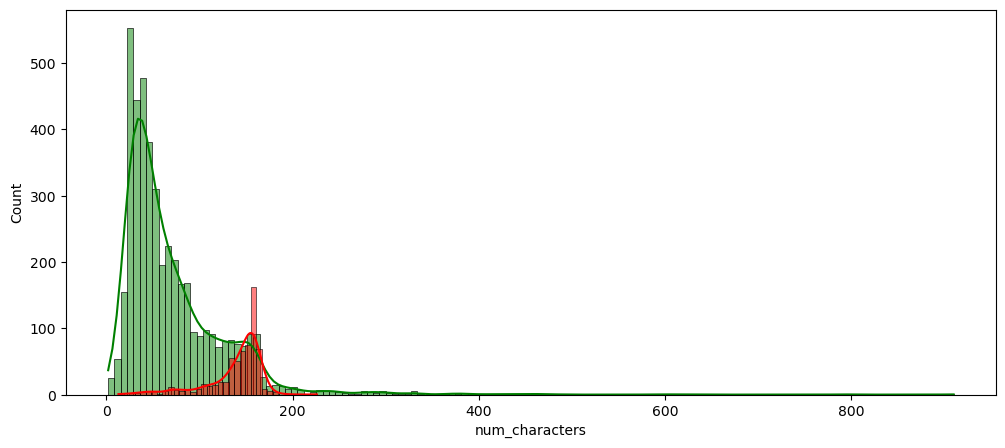

In [41]:
# based onm the number of characters    # green is not spam and red is spam messages 
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
sns.histplot(df[df['target']==0]['num_characters'],color='green',kde=True)
sns.histplot(df[df['target']==1]['num_characters'],color='red',kde=True)
plt.show()


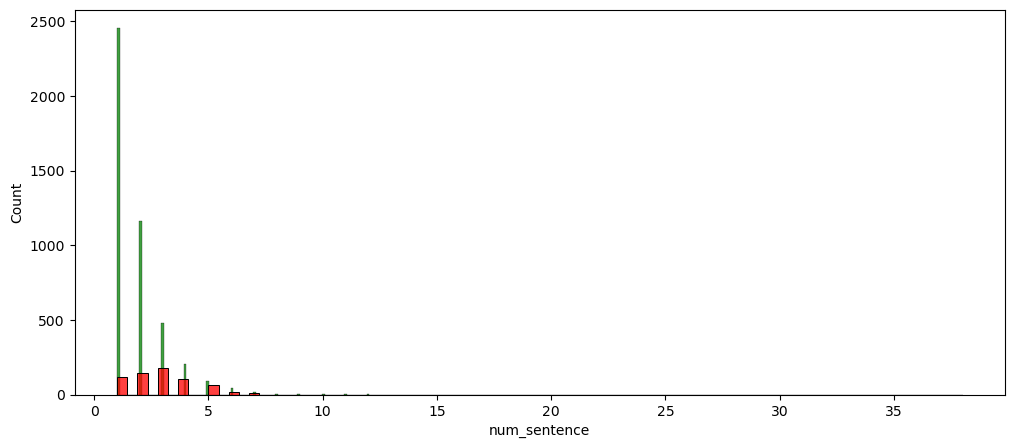

In [42]:
# based on the numbner of senrtences 
plt.figure(figsize=(12,5))
dats=df[df['target']==0]['num_characters']
sns.histplot(df[df['target']==0]['num_sentence'],color='green')
sns.histplot(df[df['target']==1]['num_sentence'],color='red')
plt.show()

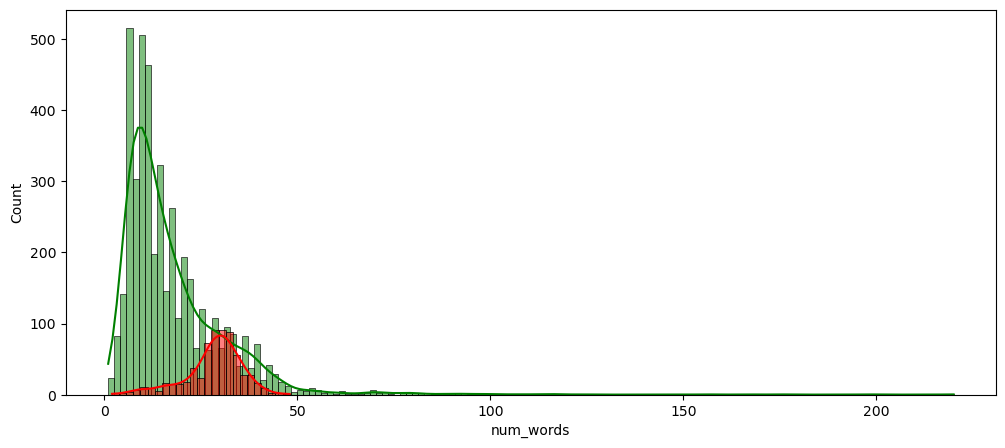

In [43]:
# bgased on the numb words
# num_words  0 is the not spam and spam is rthe spam messages 
plt.figure(figsize=(12,5))
dats=df[df['target']==0]['num_characters']
sns.histplot(df[df['target']==0]['num_words'],color='green',kde=True)
sns.histplot(df[df['target']==1]['num_words'],color='red',kde=True)
plt.show()

# show the correlations of the datas

In [44]:
# corrrlations matrix 
df[['num_characters','num_words','num_sentence','target']].corr()

,num_characters,num_words,num_sentence,target
num_characters,1.000000,0.964363,0.622613,0.385941
num_words,0.964363,1.000000,0.669909,0.262631
num_sentence,0.622613,0.669909,1.000000,0.266094
target,0.385941,0.262631,0.266094,1.000000


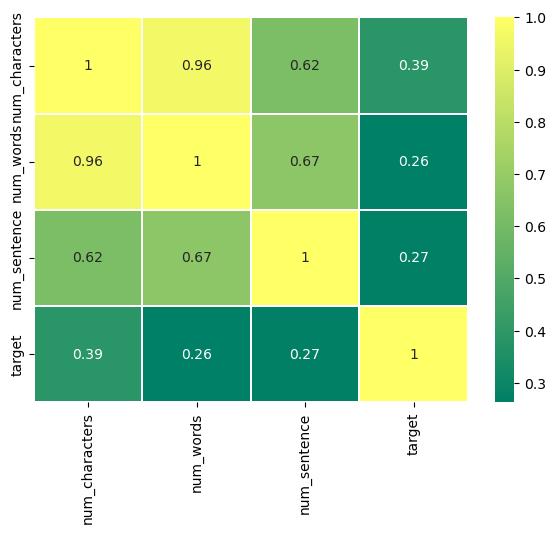

In [45]:
# see the matrix in the heatmaps
plt.figure(figsize=(7,5))
sns.heatmap(df[['num_characters','num_words','num_sentence','target']].corr(),annot=True,cmap='summer',linewidth=0.1)
plt.xticks(rotation='vertical')
plt.show()

# data preprocessings
## lower cases 
## tokenizations
## removing special chartacters 
## remove the stope words and punctuations 
## stemmings 

In [49]:
from nltk.corpus import stopwords
import string
def transform_text(text):
    text=text.lower() # convert all the cgaracters into the lower cases 
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return ' '.join(y)

In [50]:
transform_text(" hellow my world hpow are you 23 45 67% 2342445  89-.,m' fucking")


'hellow world hpow 23 45 67 2342445 fuck'

In [51]:
print('90abcdefghijklmn'.isalnum())  # this will remove all the unnenecessary symbols 

True


In [52]:
transform_text("hellow my name is saroj giri my age is 20 yeARS")

'hellow name saroj giri age 20 year'

In [53]:
transform_text("DID you like my presentations on the ai and ML?")

'like present ai ml'

In [48]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
print(ps.stem('walking'))
ps.stem('dancing')

walk


'danc'

In [54]:
lists=['dancing','walking','walks','singing','singed','fucking','fucked','fucks','laughing','loving']
for i in lists:
    print(ps.stem(i))

danc
walk
walk
sing
sing
fuck
fuck
fuck
laugh
love


# apply the transformed text for the further pre processings

In [55]:
df['message'].apply(transform_text)  # this will take some amount of the time therere are more than 45000 datas ion our tables 

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5517    2nd time tri 2 contact u pound prize 2 claim e...
5518                                b go esplanad fr home
5519                                    piti mood suggest
5520    guy bitch act like interest buy someth els nex...
5521                                       rofl true name
Name: message, Length: 5126, dtype: object

In [56]:
# this will transformk all the message and we have to perform the further 
# now comnvert the dtaa into the dtaframes for the backup
import tqdm
df['transformed_text']=df['message'].apply(transform_text)

In [ ]:
# this will take some of the times if th
#!pip install tqdm

In [57]:
df.head()

,target,message,num_characters,num_words,num_sentence,transformed_text
0,0,"""Go until jurong point, crazy.. Available only...",113,26,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"""Nah I don't think he goes to usf, he lives ar...",63,17,1,nah think goe usf live around though


In [58]:
df['transformed_text'][16]

'oh k watch'

# generates the wqord colud of the spam and the not spam merssages 

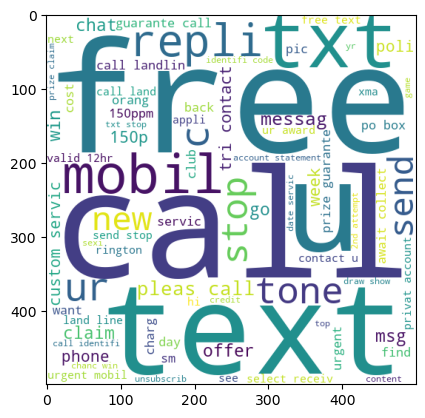

In [59]:
# word cloud for the spam messages 
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=' '))
plt.imshow(spam_wc)

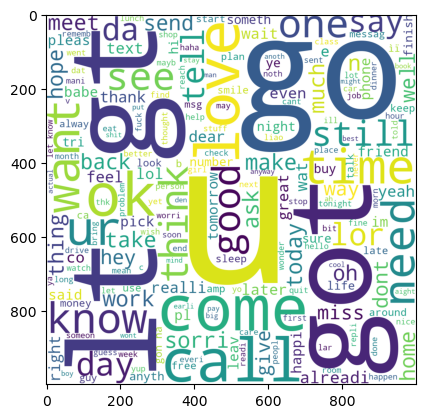

In [60]:
# word cloud for the ham message ie not a spam messages 
wc=WordCloud(width=1000,height=1000,min_font_size=10,background_color='white')
spam_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=' '))
plt.imshow(spam_wc)

# find the frequent words from the messages 

In [61]:
# frequent words in the spam messages 
df[df['target']==1]['transformed_text'].tolist()[2]  # this will convert the messages into the lists 

'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour'

In [62]:
# split the messages 
for msg in df[df['target']==1]['transformed_text'].tolist():
    print(msg)

free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18
freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv
winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour
mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030
six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info
urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18
xxxmobilemovieclub use credit click wap link next txt messag click http
england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq
thank subscript rington uk mobil charg pleas confirm repli ye repli charg
07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow
sm ac sptv new jersey devil detroit red wi

In [63]:
# find the frequent word used by the spam
spam_corus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corus.append(word)

In [64]:
len(spam_corus)

9901

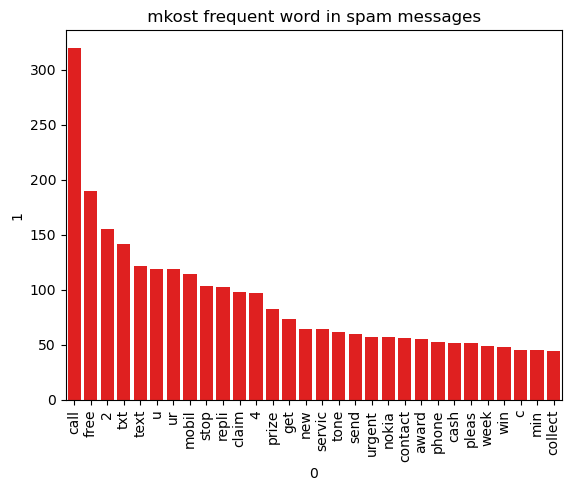

In [65]:
from collections import Counter
Counter(spam_corus).most_common(30)  # this is list inside the tupples
datas=pd.DataFrame(Counter(spam_corus).most_common(30))
sns.barplot(data=datas,x=datas[0],y=datas[1],orient='v',color='red')
plt.xticks(rotation='vertical')
plt.title(" mkost frequent word in spam messages ")
plt.show()

In [66]:
datas.head()

,0,1
0,call,320
1,free,190
2,2,155
3,txt,141
4,text,121


# most frequent words in the not spam messages 

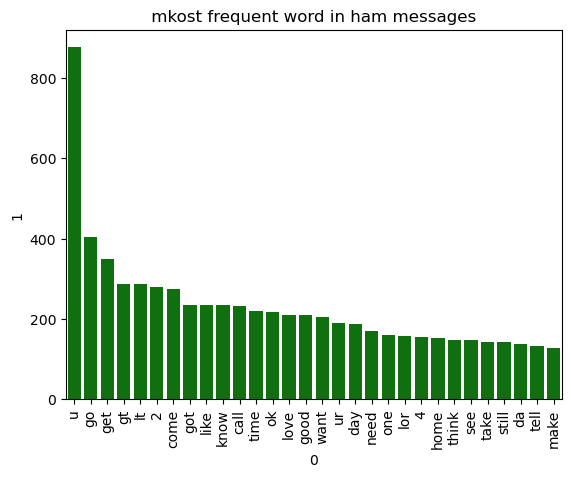

In [67]:
# frequent messages in the ham messages 
ham_corus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corus.append(word)
Counter(ham_corus).most_common(30)  # this is list inside the tupples
datas1=pd.DataFrame(Counter(ham_corus).most_common(30))
sns.barplot(data=datas1,x=datas1[0],y=datas1[1],orient='v',color='green')
plt.xticks(rotation='vertical')
plt.title(" mkost frequent word in ham messages ")
plt.show()

# model buildings

In [68]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [69]:
x=cv.fit_transform(df['transformed_text']).toarray()

In [70]:
x.shape

(5126, 6644)

In [71]:
len(x)*len(x[2])  #total words 

34057144

In [ ]:
5126*6644

In [72]:
y=df['target'].values

In [73]:
len(y)

5126

# save the new datasets 

In [75]:
df.head()

,target,message,num_characters,num_words,num_sentence,transformed_text
0,0,"""Go until jurong point, crazy.. Available only...",113,26,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"""Nah I don't think he goes to usf, he lives ar...",63,17,1,nah think goe usf live around though


In [76]:
df.to_csv("E:\\6th semmmm\\spam\\final_clean.csv",index='False')
print(" save the files sucessfully")

 save the files sucessfully
